# Задание 1.
### Что не так с исходными данными?
В первую очередь нужно отметить, что содержимое графика не соответствует его описанию. График показывает динамику не в процентах, а в абсолютных значениях. Более того, он показывает динамику не год от года, а относительно 2008 года что, обычно, не имеет смысла и недостаточно внимательный читатель неверно истолкует иллюстрации.

### Что же делать?
Зависит от того, что мы хотим показать.
Самая простая и, в то же время, понятная иллюстрация - это абсолютных доход указанных компаний за указанный период. На нём будет хорошо видно место молодого новичка "Shumber" относительно других игроков рынка

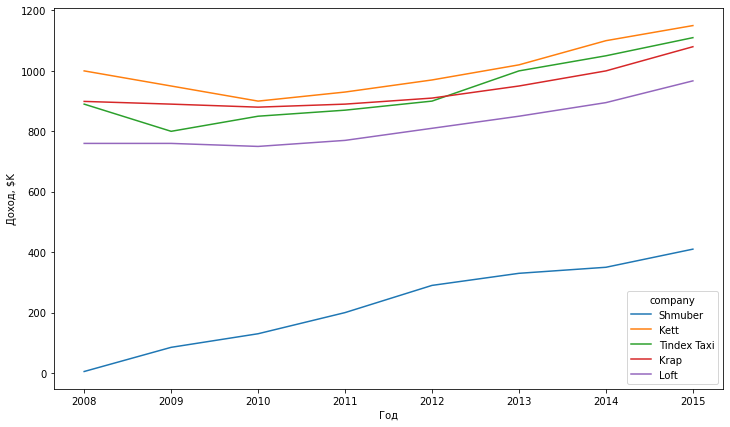

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("HW_2_pt_1.xlsx")

# Строим график
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df, x="year", y="revenue, $K", hue="company", ax=ax)
ax.set_xlabel("Год")
ax.set_ylabel("Доход, $K")

plt.show()

На графике выше видно, что:
1. с одной стороны, компания уверенно растёт
2. на данный момент её доход всё ещё в 2-3 раза ниже чем у конкурентов
3. компания не отвоёвывает рынок у конкурентов, а, по-видимому, растёт за счёт того, что работает на растущем рынке (конкретны тоже растут)

Если мы хотим показать насколько быстро растёт доход компании "Shumber", то можем продемонстрировать график роста дохода, причём:
1. сравнивать доход с предыдущим годом, а не с первым, и в процентах, а не в абсолютных числах;
2. не показывать на графике 2009 год, т.к. за этот год доход вырос в 17 раз, что плохо отразиться на наглядности графика

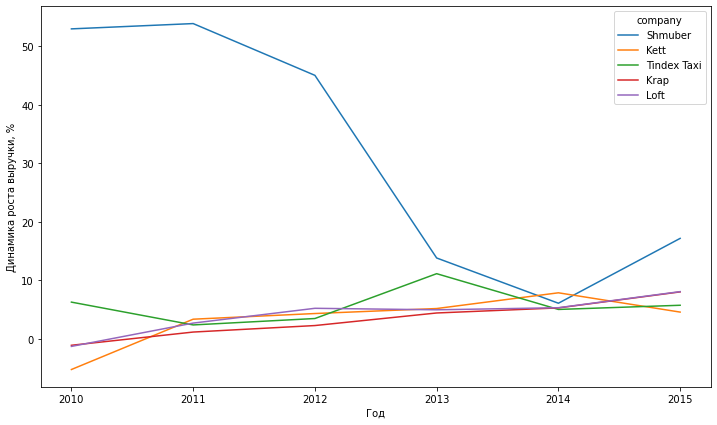

In [3]:
df = pd.read_excel("HW_2_pt_1.xlsx")

# Для каждой компании вычисляем столбец "growth, %", который показывает как вырос
# показатель "revenue" за соответствующий год.
companies = {}
for company in df["company"].unique():
    df_company = df[["year", "company", "revenue, $K"]][(df["company"] == company) & (df["year"] >= 2008)]
    revenue = df_company["revenue, $K"]
    shifted_revenue = revenue.shift(1)
    df_company["growth, %"] = 100 * (revenue - shifted_revenue) / shifted_revenue
    companies.update({company: df_company})

df_all = pd.concat(companies.values())
df_all = df_all[df_all["year"] > 2009]

# Строим график
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data=df_all, x="year", y="growth, %", hue="company", ax=ax)
ax.set_xlabel("Год")
ax.set_ylabel("Динамика роста дохода, %")

plt.show()

Этот график выглядит более выигрышно для "Shumber", т.к. молодые компании могут показывать более быстрый рост, чем большие компании.

# Задание 2

На иллюстрации, предложенной в задании 2 есть следующая проблема: т.к. строка "others" не показана на диаграмме, возникает ложное ощущение, что весь рынок разделён лидерами на 5 примерно равных частей. Чтобы увидеть информацию более объективно, необходимо включить "others" в иллюстрацию

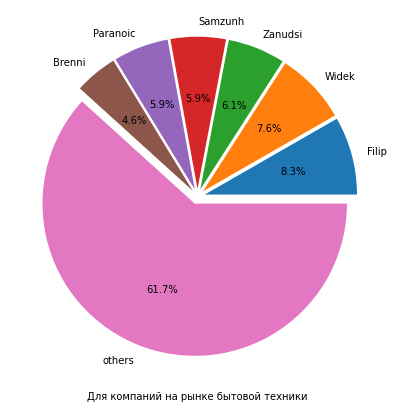

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("HW_2_pt_2.xlsx")

df["market_share, %"] = 100 * df["revenue, $M"] / df["revenue, $M"].sum()

# Строим график
fig, ax = plt.subplots(figsize=(12, 7))
ax.pie(x=df["market_share, %"], labels=df["company"], autopct='%1.1f%%', explode=[0.05]*len(df))
ax.set_xlabel("Для компаний на рынке бытовой техники")

plt.show()